In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt 
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score 
from sklearn.metrics import confusion_matrix

1. โหลด csv เข้าไปใน Python Pandas

In [60]:
df = pd.read_csv('https://raw.githubusercontent.com/TawanTan/Wine_dataset/master/datasets_308180_627001_Wine.csv')

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [3]:
df.head(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   
5    14.20        1.76  2.45          15.2        112           3.27   
6    14.39        1.87  2.45          14.6         96           2.50   
7    14.06        2.15  2.61          17.6        121           2.60   
8    14.83        1.64  2.17          14.0         97           2.80   
9    13.86        1.35  2.27          16.0         98           2.98   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   
5        3.39                  0.34             1.97             6.75  1.05   
6        2.52                  0.30             1.98             5.25  1.02   
7        2.51                  0.31             1.25             5.05  1.06   
8        2.98                  0.29             1.98             5.20  1.08   
9        3.15                  0.22             1.85             7.22  1.01   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  
1   3.40     1050                 1  
2   3.17     1185                 1  
3   3.45     1480                 1  
4   2.93      735                 1  
5   2.85     1450                 1  
6   3.58     1290                 1  
7   3.58     1295                 1  
8   2.85     1045                 1  
9   3.55     1045                 1

In [4]:
df.tail(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
168    13.58        2.58  2.69          24.5        105           1.55   
169    13.40        4.60  2.86          25.0        112           1.98   
170    12.20        3.03  2.32          19.0         96           1.25   
171    12.77        2.39  2.28          19.5         86           1.39   
172    14.16        2.51  2.48          20.0         91           1.68   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
168        0.84                  0.39             1.54         8.660000  0.74   
169        0.96                  0.27             1.11         8.500000  0.67   
170        0.49                  0.40             0.73         5.500000  0.66   
171        0.51                  0.48             0.64         9.899999  0.57   
172        0.70                  0.44             1.24         9.700000  0.62   
173        0.61                  0.52             1.06         7.700000  0.64   
174        0.75                  0.43             1.41         7.300000  0.70   
175        0.69                  0.43             1.35        10.200000  0.59   
176        0.68                  0.53             1.46         9.300000  0.60   
177        0.76                  0.56             1.35         9.200000  0.61   

     OD280  Proline  Customer_Segment  
168   1.80      750                 3  
169   1.92      630                 3  
170   1.83      510                 3  
171   1.63      470                 3  
172   1.71      660                 3  
173   1.74      740                 3  
174   1.56      750                 3  
175   1.56      835                 3  
176   1.62      840                 3  
177   1.60      560                 3

In [5]:
df.sample(10)

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
14     14.38        1.87  2.38          12.0        102           3.30   
135    12.60        2.46  2.20          18.5         94           1.62   
109    11.61        1.35  2.70          20.0         94           2.74   
72     13.49        1.66  2.24          24.0         87           1.88   
168    13.58        2.58  2.69          24.5        105           1.55   
7      14.06        2.15  2.61          17.6        121           2.60   
86     12.16        1.61  2.31          22.8         90           1.78   
40     13.56        1.71  2.31          16.2        117           3.15   
58     13.72        1.43  2.50          16.7        108           3.40   
18     14.19        1.59  2.48          16.5        108           3.30   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
14         3.64                  0.29             2.96             7.50  1.20   
135        0.66                  0.63             0.94             7.10  0.73   
109        2.92                  0.29             2.49             2.65  0.96   
72         1.84                  0.27             1.03             3.74  0.98   
168        0.84                  0.39             1.54             8.66  0.74   
7          2.51                  0.31             1.25             5.05  1.06   
86         1.69                  0.43             1.56             2.45  1.33   
40         3.29                  0.34             2.34             6.13  0.95   
58         3.67                  0.19             2.04             6.80  0.89   
18         3.93                  0.32             1.86             8.70  1.23   

     OD280  Proline  Customer_Segment  
14    3.00     1547                 1  
135   1.58      695                 3  
109   3.26      680                 2  
72    2.78      472                 2  
168   1.80      750                 3  
7     3.58     1295                 1  
86    2.26      495                 2  
40    3.38      795                 1  
58    2.87     1285                 1  
18    2.82     1680                 1

3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น

In [10]:
df.drop('Customer_Segment',axis=1).describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

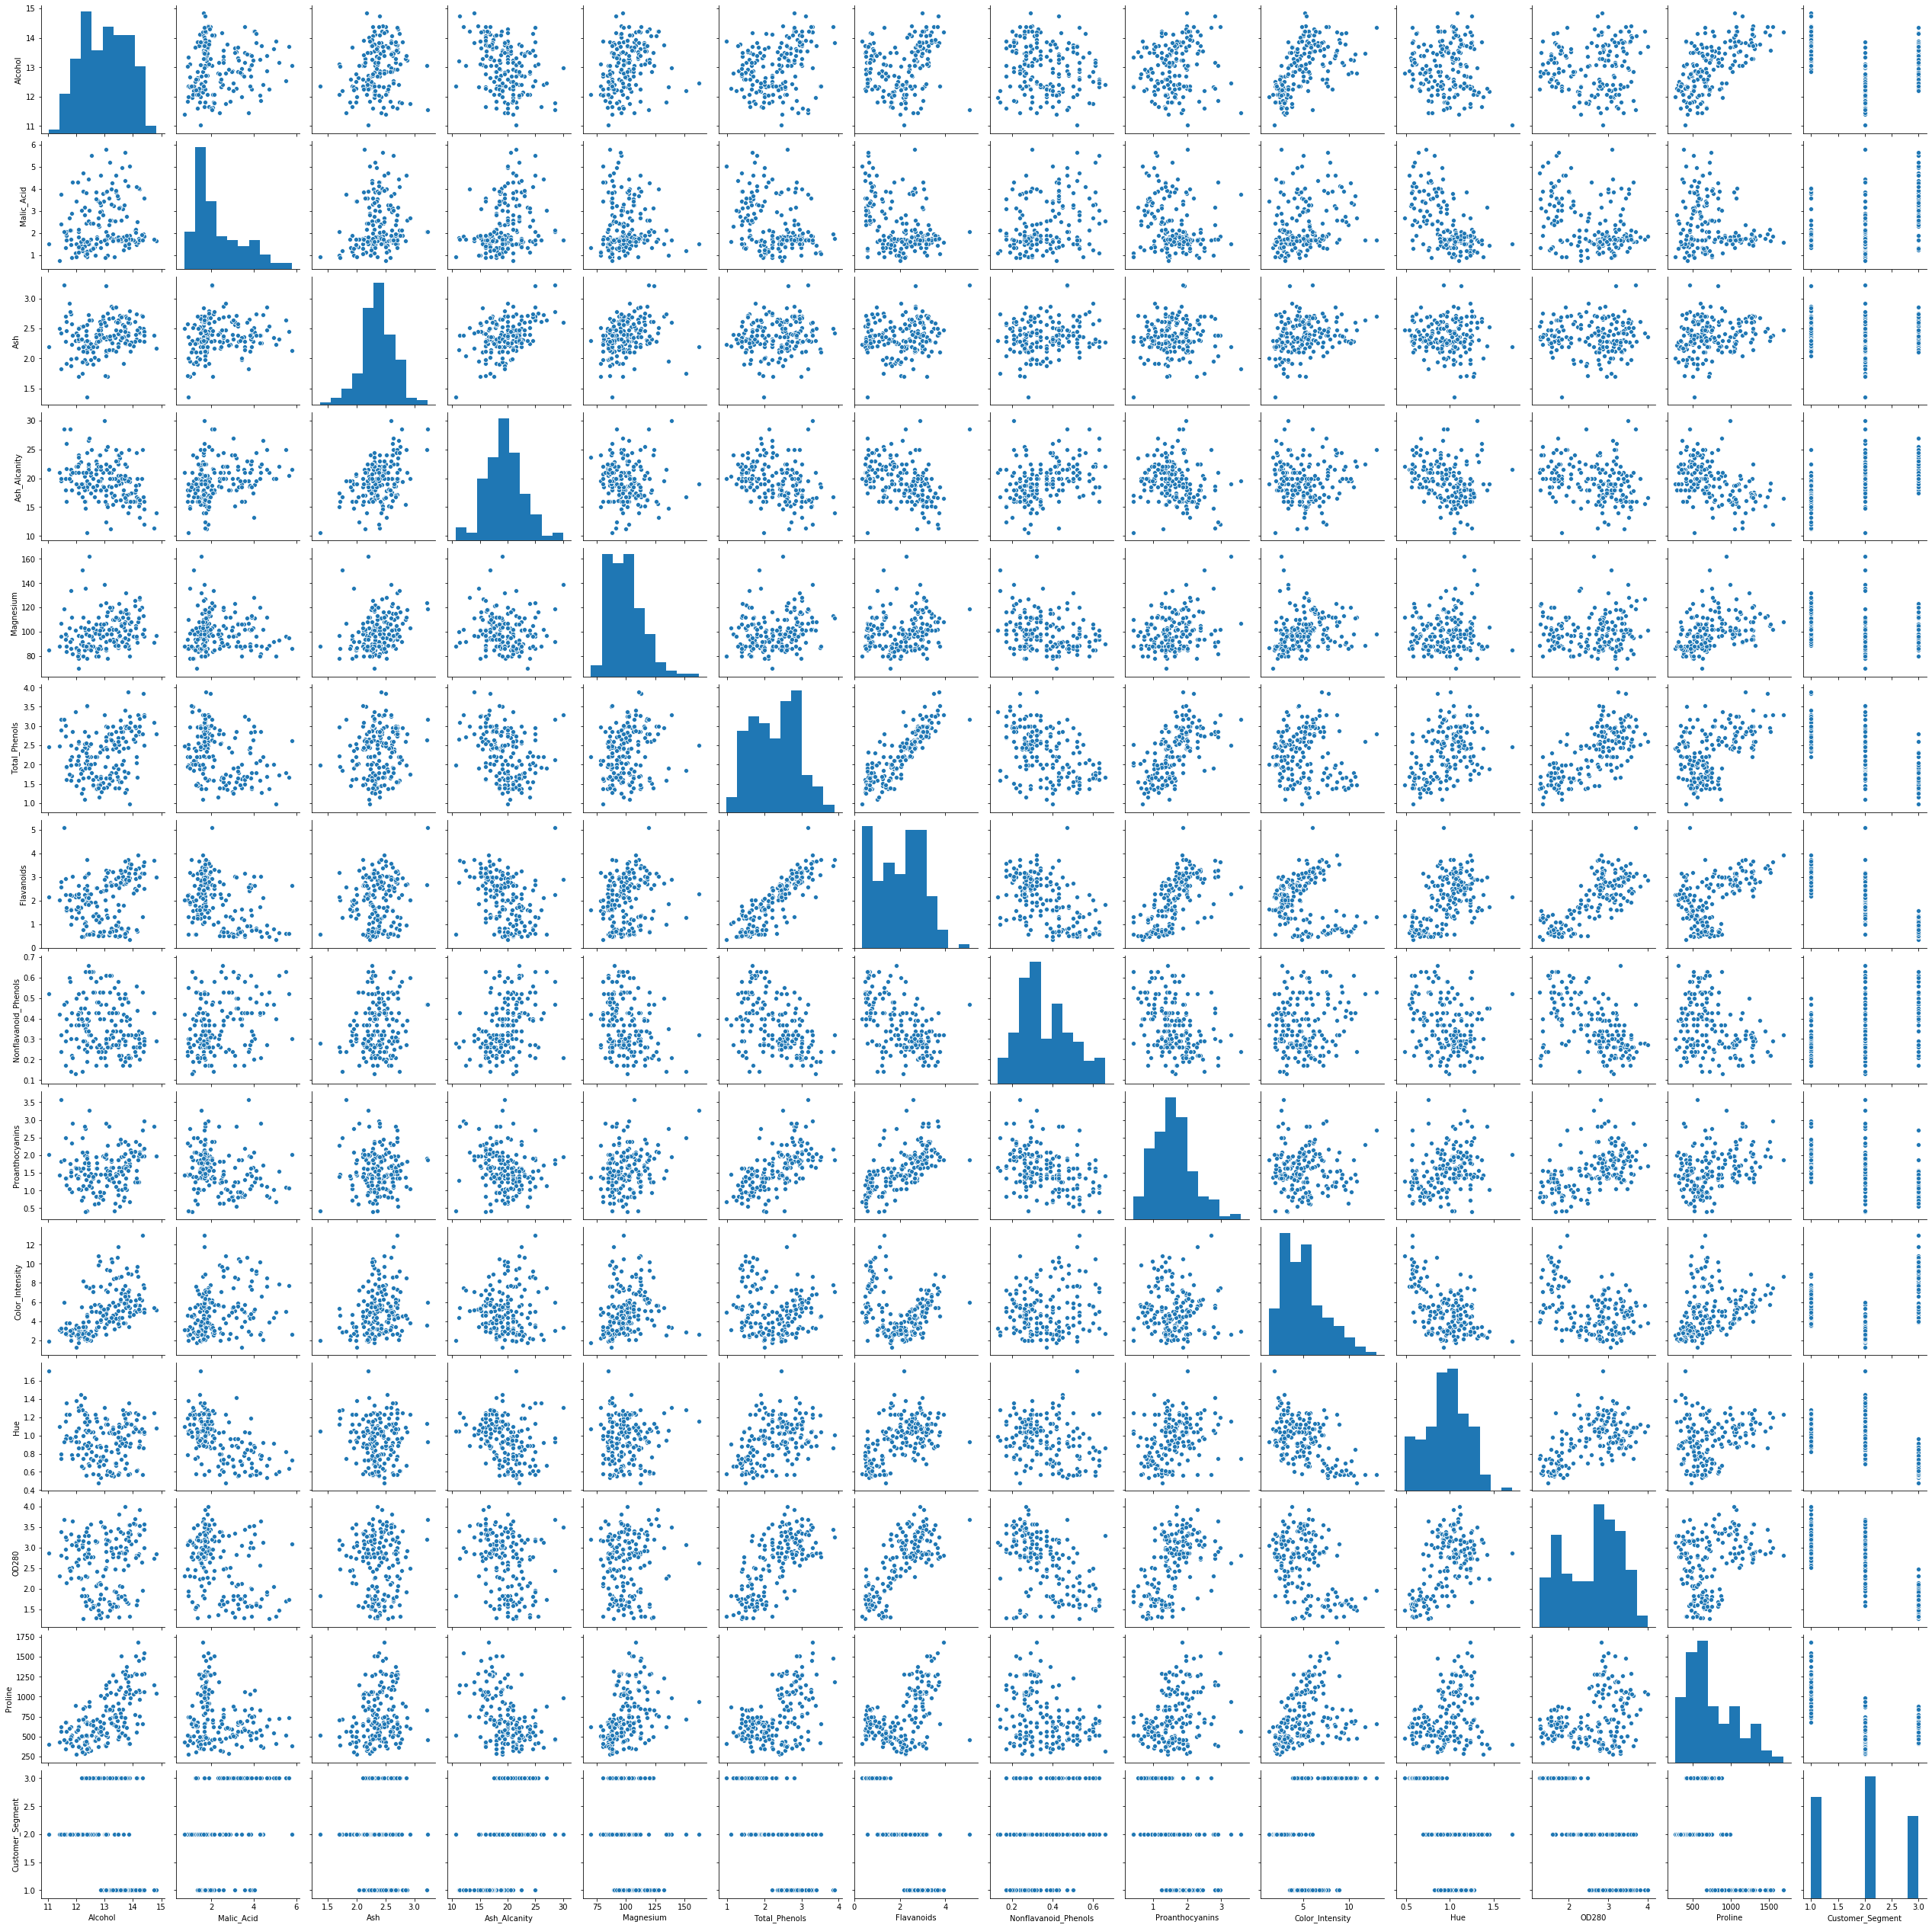

In [11]:
sns.pairplot(df)

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

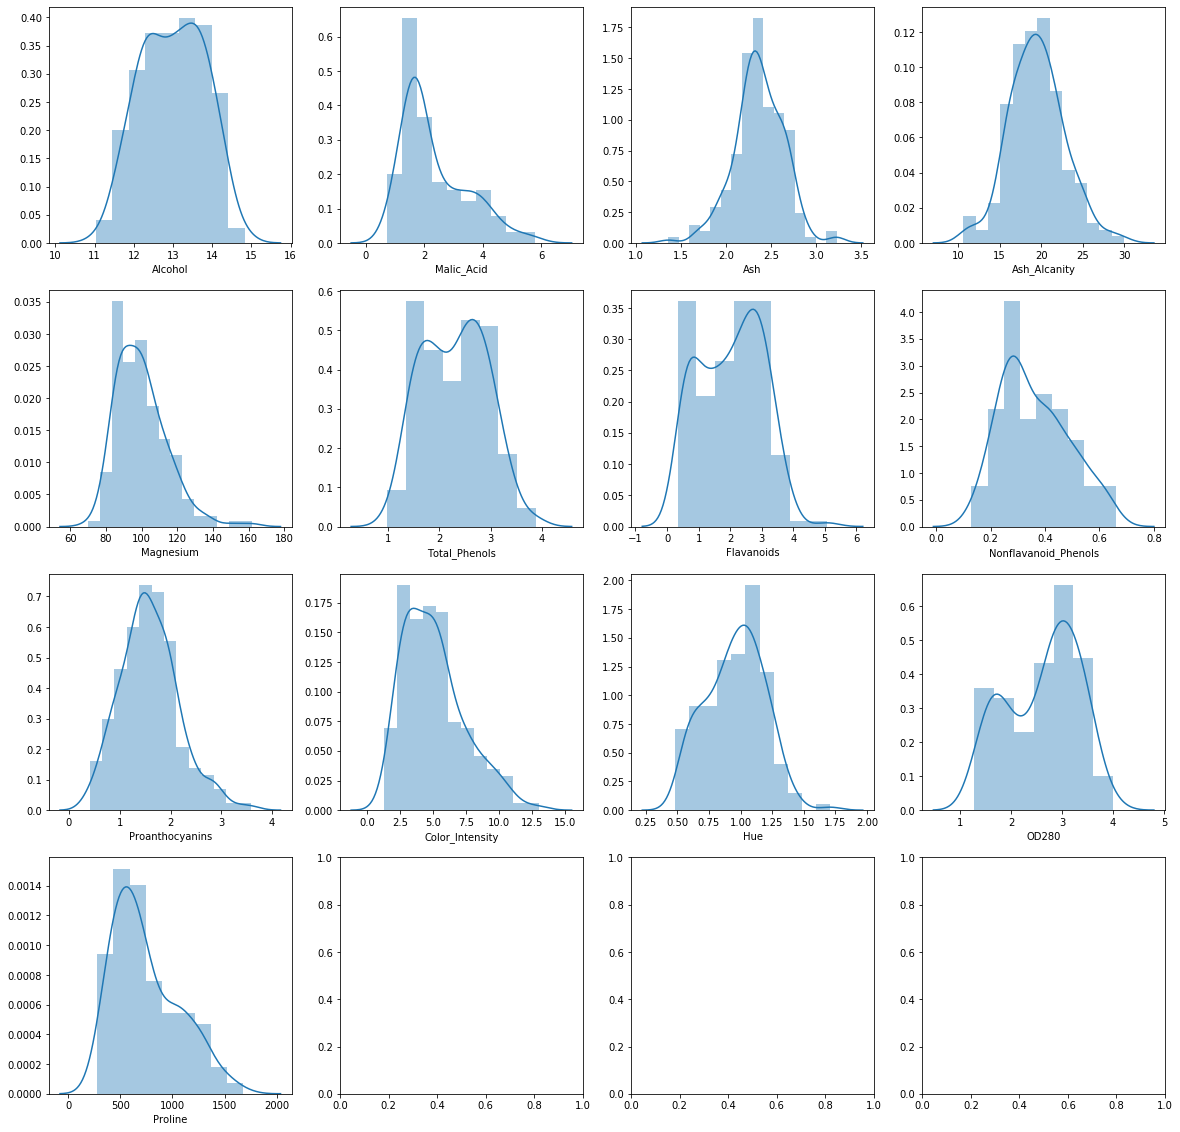

In [19]:
f, axes = plt.subplots(4, 4, figsize=(20,20))
axes=axes.ravel()
for i,j in enumerate(df.drop('Customer_Segment', axis=1)):
    plot=sns.distplot(df[j], ax=axes[i])

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

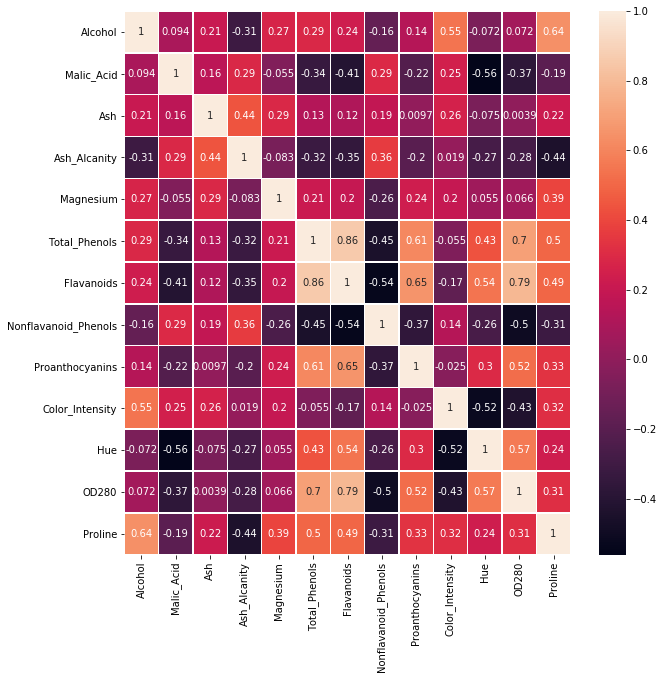

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(df.drop('Customer_Segment', axis = 1).corr(), annot = True, linecolor = 'white', linewidths = 0.5)

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

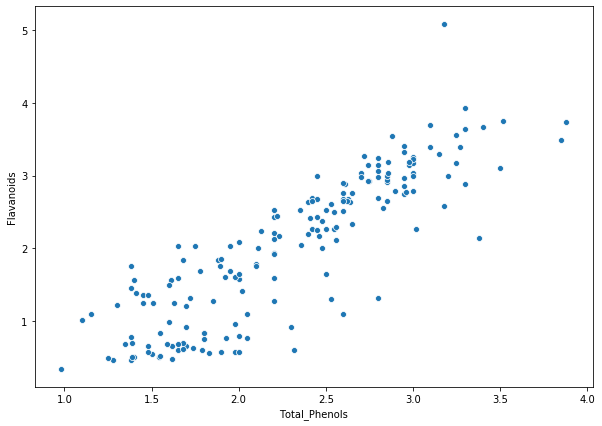

In [15]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'Total_Phenols', y = 'Flavanoids')

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

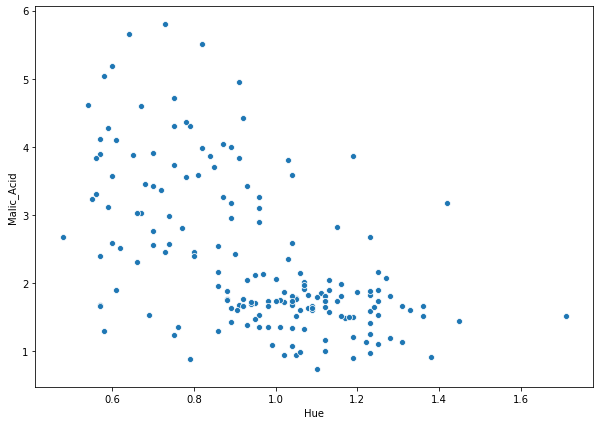

In [16]:
plt.figure(figsize = (10, 7))
sns.scatterplot(data = df, x = 'Hue', y = 'Malic_Acid')

10. สร้าง histogram ของ feature เพื่อดูการกระจายตัวของข้อมูล

11. สร้าง boxplot เพื่อเช็ค outliers ของแต่ละฟีเจอร์

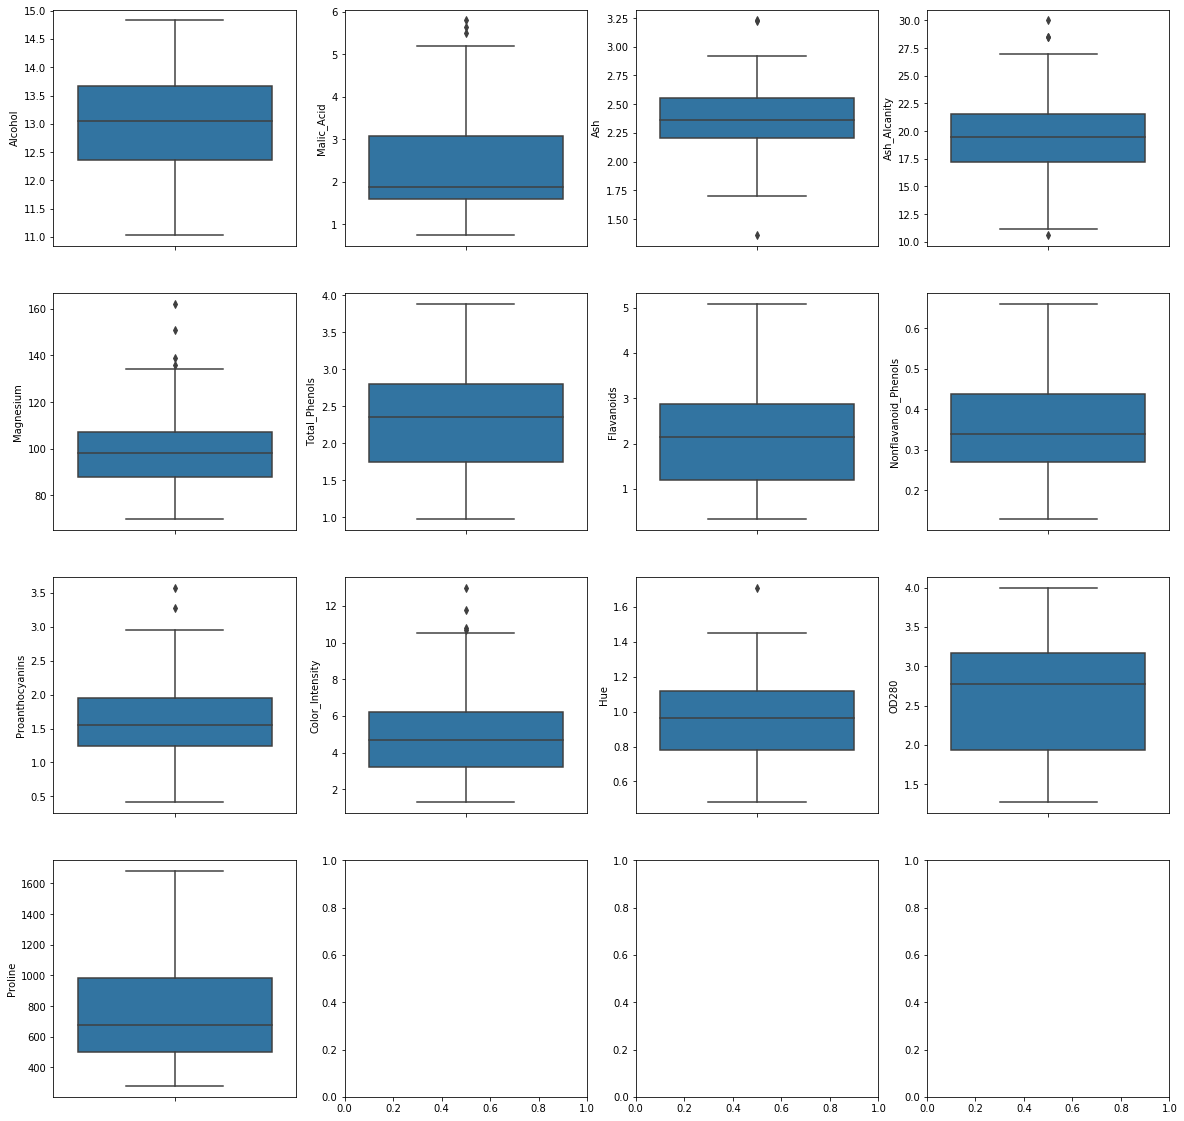

In [25]:
f, axes = plt.subplots(4, 4, figsize = (20, 20))
axes = axes.ravel()
for i, j in enumerate(df.drop('Customer_Segment', axis = 1)):
    plot = sns.boxplot(df[j], ax = axes[i], orient = 'v')

12. จัดการกับ Outliers ได้ตามความเหมาะสม

In [61]:
def outlier_detection(feature):
    for i in feature:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        upper_fence = q3 + 1.5 * (q3 - q1)
        lower_fence = q1 - 1.5 * (q3 - q1)
        df[i] = [upper_fence if x > q3 else (lower_fence if x < q1 else x) for x in df[i]]

In [62]:
outlier_detection(['Ash', 'Hue'])

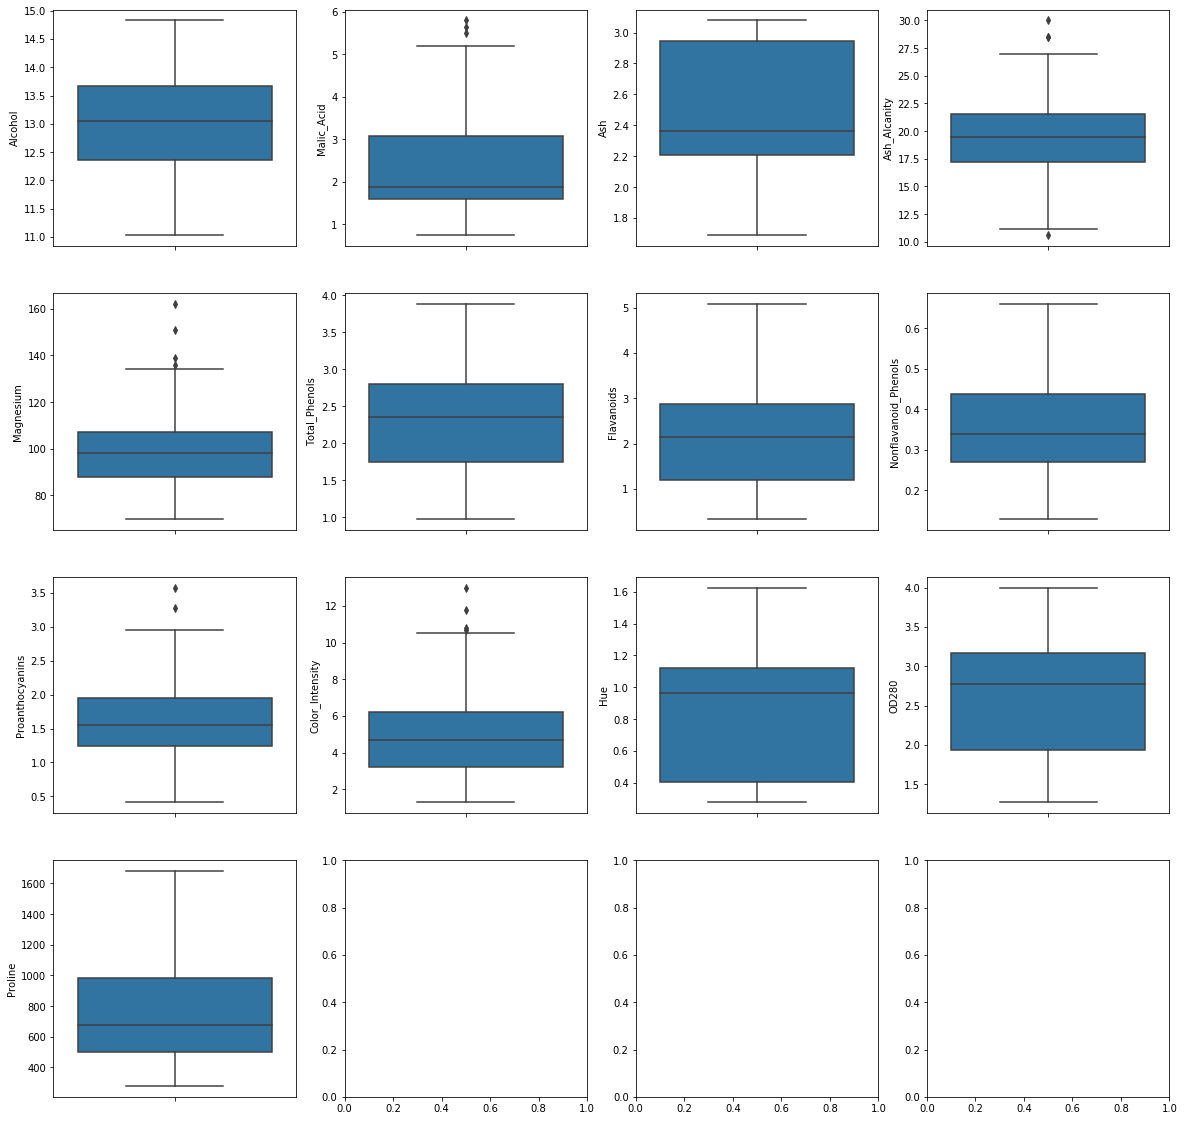

In [63]:
f, axes = plt.subplots(4, 4, figsize = (20, 20))
axes = axes.ravel()
for i, j in enumerate(df.drop('Customer_Segment', axis = 1)):
    plot = sns.boxplot(df[j], ax = axes[i], orient = 'v')

13. สร้าง train/test split ของข้อมูล ด้วย 70:30 ratio

In [64]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Customer_Segment', axis = 1), 
                                                    df['Customer_Segment'], test_size = 0.3, random_state = 111)

14. ทำ Standardization ให้ X_train, X_test

In [65]:
X_scaler = StandardScaler()
X_std_train = X_scaler.fit_transform(X_train)
X_std_test = X_scaler.transform(X_test)

15. เลือกชนิดของ Baseline โมเดล 3 ชนิด 
(ซ้ำกับ PCA 2 ชนิด และ อันใหม่ 1 ชนิด)

In [66]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

16. เทรนโมเดลทั้ง 3 ชนิด

In [67]:
svm = SVC()
svm.fit(X_std_train, y_train)
svm_pred = svm.predict(X_std_test)

In [69]:
rf = RandomForestClassifier()
rf.fit(X_std_train, y_train)
rf_pred = rf.predict(X_std_test)

In [70]:
lr = LogisticRegression()
lr.fit(X_std_train, y_train)
lr_pred = lr.predict(X_std_test)

17. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

### SVM

In [71]:
from sklearn.metrics import classification_report

In [72]:
print(confusion_matrix(y_test, svm_pred))

[[17  0  0]
 [ 0 21  1]
 [ 0  0 15]]


In [73]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.95      0.98        22
           3       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### RF

In [74]:
print(confusion_matrix(y_test, rf_pred))

[[17  0  0]
 [ 1 20  1]
 [ 0  0 15]]


In [76]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        22
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



### LR

In [77]:
print(confusion_matrix(y_test, lr_pred))

[[16  1  0]
 [ 1 20  1]
 [ 0  0 15]]


In [78]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.95      0.91      0.93        22
           3       0.94      1.00      0.97        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.95        54
weighted avg       0.94      0.94      0.94        54



18. ทำ hyperparameter tuning ด้วย GridSearchCV

### SVM with Grid

In [79]:
svm_param = {'C':[0.01, 0.1, 1, 10, 100, 1000], 'gamma':[0.01, 0.1, 1, 10, 100, 1000]}
svm_grid = GridSearchCV(SVC(), svm_param, verbose=3)
svm_grid.fit(X_std_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.375, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................... C=0.1, gamma=1000, score=0.375, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=0.958, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] .................... C=10, gamma=1000, score=0.400, total=   0.0s
[CV] C=10, gamma=1000 ................................................
[CV] .................... C=10, gamma=1000, score=0.400, total=   0.0s
[CV] C=10, gamma=1000 ................................................
[CV] .................... C=10, gamma=1000, score=0.375, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.01 ...............................................
[CV] .

[CV] .................. C=1000, gamma=1000, score=0.400, total=   0.0s
[CV] C=1000, gamma=1000 ..............................................
[CV] .................. C=1000, gamma=1000, score=0.400, total=   0.0s
[CV] C=1000, gamma=1000 ..............................................
[CV] .................. C=1000, gamma=1000, score=0.375, total=   0.0s


[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [80]:
svm_grid_pred = svm_grid.predict(X_std_test)

### RF with Grid

In [81]:
rf_param = {'max_depth' : [4, 8, 16, 32, 64, 128, 256], 
            'min_samples_leaf' : [1, 2, 4, 8, 12, 16, 20],
            'n_estimators' : [10, 20, 50, 100, 300, 500]}
rf_grid = GridSearchCV(RandomForestClassifier(), param_grid=rf_param, verbose=3)
rf_grid.fit(X_std_train, y_train)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.917, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total= 

[CV]  max_depth=4, min_samples_leaf=4, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total= 

[CV]  max_depth=4, min_samples_leaf=12, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, 

[CV]  max_depth=4, min_samples_leaf=20, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=20, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, 

[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=0.920, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total= 

[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=0.920, total= 

[CV]  max_depth=8, min_samples_leaf=12, n_estimators=500, score=0.958, total=   1.5s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, score=0.920, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=10 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=10, score=0.958, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=20, score=1.000,

[CV]  max_depth=8, min_samples_leaf=20, n_estimators=300, score=1.000, total=   0.4s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=300 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=300, score=0.958, total=   0.7s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=500, score=0.960, total=   0.9s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=500, score=1.000, total=   1.1s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=500, score=1.000, total=   0.9s
[CV] max_depth=8, min_samples_leaf=20, n_estimators=500 ..............
[CV]  max_depth=8, min_samples_leaf=20, n_estimators=500, score=

[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=100, score=0.958, total=   0.2s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=300 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=300 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=16, min_samples_leaf=2, n_estimators=300 ..............
[CV]  max_depth=16, min_samples_leaf=2, n_estimators=300, score=

[CV]  max_depth=16, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=50, score=0.920, total=   0.1s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=16, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=16, min_samples_leaf=8, n_estimators=100, score=0.88

[CV]  max_depth=16, min_samples_leaf=16, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=20 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=20, score=0.920, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=20 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=20 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=16, n_estimators=50, score=

[CV]  max_depth=16, min_samples_leaf=20, n_estimators=500, score=0.958, total=   1.5s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, score=0.960, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=10, score=0.958, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=1, n_estimators=20, score=1.000

[CV]  max_depth=32, min_samples_leaf=2, n_estimators=300, score=0.960, total=   0.5s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=300 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=300 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=300, score=0.958, total=   0.5s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=500, score=1.000, total=   0.9s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=500, score=1.000, total=   0.8s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=500, score=0.960, total=   0.8s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=500, score=

[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=100 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=100, score=0.917, total=   0.2s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=300, score=

[CV]  max_depth=32, min_samples_leaf=16, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=0.920, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=100, score

[CV]  max_depth=64, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=10 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=0.960, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=1.000, 

[CV]  max_depth=64, min_samples_leaf=2, n_estimators=500, score=1.000, total=   0.8s
[CV] max_depth=64, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=64, min_samples_leaf=2, n_estimators=500, score=1.000, total=   0.8s
[CV] max_depth=64, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=64, min_samples_leaf=2, n_estimators=500, score=0.960, total=   0.8s
[CV] max_depth=64, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=64, min_samples_leaf=2, n_estimators=500, score=1.000, total=   0.8s
[CV] max_depth=64, min_samples_leaf=2, n_estimators=500 ..............
[CV]  max_depth=64, min_samples_leaf=2, n_estimators=500, score=0.958, total=   0.8s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=10 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=10 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=10, score=0.

[CV]  max_depth=64, min_samples_leaf=8, n_estimators=100, score=0.958, total=   0.2s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=300, score=0.960, total=   0.5s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=300 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=300, score=0.958, total=   0.6s
[CV] max_depth=64, min_samples_leaf=8, n_estimators=500 ..............
[CV]  max_depth=64, min_samples_leaf=8, n_estimators=500, score=

[CV]  max_depth=64, min_samples_leaf=16, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=100 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=100, sc

[CV]  max_depth=128, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=20 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=50, score=

[CV]  max_depth=128, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=20 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=

[CV]  max_depth=128, min_samples_leaf=12, n_estimators=20, score=0.920, total=   0.0s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50,

[CV]  max_depth=128, min_samples_leaf=16, n_estimators=500, score=0.958, total=   0.8s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=10 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=10 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=10 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=10, score=0.840, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=10 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=10 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=10, score=0.958, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=20

[CV]  max_depth=256, min_samples_leaf=1, n_estimators=300, score=0.960, total=   0.5s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=300 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=300 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=500 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=500, score=1.000, total=   0.8s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=500 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=500, score=1.000, total=   0.9s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=500 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=500, score=0.960, total=   0.8s
[CV] max_depth=256, min_samples_leaf=1, n_estimators=500 .............
[CV]  max_depth=256, min_samples_leaf=1, n_estimators=500,

[CV]  max_depth=256, min_samples_leaf=4, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=100 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=100, score=0.920, total=   0.2s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=100 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=100 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=100, score=0.958, total=   0.2s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=300 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=300 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=300, score=1.000, total=   0.5s
[CV] max_depth=256, min_samples_leaf=4, n_estimators=300 .............
[CV]  max_depth=256, min_samples_leaf=4, n_estimators=300,

[CV]  max_depth=256, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=50, score=0.958, total=   0.1s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=100 ............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=100 ............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=256, min_samples_leaf=12, n_estimators=100 ............
[CV]  max_depth=256, min_samples_leaf=12, n_estimators=1

[CV]  max_depth=256, min_samples_leaf=20, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=20 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=20 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=20, n_estimators=50,

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:  7.5min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [83]:
rf_grid_pred = rf_grid.predict(X_std_test)

### LR with Grid

In [89]:
lr_param = {'penalty' : ['l1', 'l2', 'elasticnet', 'none'], 
            'C' : [2, 3, 4, 5, 6, 7, 8, 9, 10],
            'solver' : ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'max_iter' : [100, 500, 1000, 2500, 5000]}
lr_grid = GridSearchCV(LogisticRegression(), param_grid = lr_param, verbose = 3)
lr_grid.fit(X_std_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=2, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=2, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=100, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 


[CV] C=2, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=2, max_iter=100, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=2, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=2, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=2, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=2, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=2, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=2, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=500, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=2, max_it

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=2, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=2, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=2, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=2, max_iter=1000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/si

[CV]  C=2, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=2, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=1000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=2, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=2, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg ........
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg ........
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg ........
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs ............
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs ............
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs ............
[CV]  C=2, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=elasticnet, solver

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site


[CV] C=2, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=sag ....................
[CV]  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=2, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=5000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=2, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=2, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=3, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-package


[CV] C=3, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=3, max_iter=100, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=3, max_iter=100, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=3, max_iter=100, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=3, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=3, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=3, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=3, max_iter=100, penalty=l

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 


[CV] C=3, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=3, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=3, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=3, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=3, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=3, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=3, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=3, max_iter=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=3, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=3, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=3, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=3, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=3, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=3, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=3, max_iter=1000, penalty=none, solver=sag ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=3, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=3, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3, max_iter=5000, penalty=l1, solver=liblinear, score=0.960, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=3, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=3, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=3, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=3, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=4, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=4, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=4, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=4, max_iter=100, penalty=l2, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=4, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=4, max_iter=100, penalty=l2, solver=saga, score=0.958, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=newton-cg .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=newton-cg .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=newton-cg .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=newton-cg .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=newton-cg, score=nan, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, pe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=4, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=4, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=4, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=liblinear ...............
[CV]  C=4, max_iter=500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=4

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=4, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=4, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=4, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=4, max_iter=1000, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=4, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=4, max_iter=1000, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=liblinear ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=liblinear ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=liblinear ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l2, solver=liblinear ................
[CV]  C=4, max_iter=1000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=4, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=4, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=4, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this 

[CV]  C=4, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=liblinear ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=liblinear ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=liblinear, score=0.960, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=liblinear ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=liblinear ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=liblinear ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=sag ......................
[CV]  C=4, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site

[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=4, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=4, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=4, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=4, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=4, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-package

[CV]  C=5, max_iter=100, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=100, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=100, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=5, max_iter=100, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=5, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=5, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=5, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=5, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=5, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=5, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=5, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=5, max_iter=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=5, max_iter=500, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=500, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=5, max_iter=500, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=5, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=5, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=5, max_iter=1000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this 

[CV]  C=5, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=5, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=5, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=5, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=5, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=newton-cg ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=5, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=5, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=1000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=5, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=5, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=5, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=5, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=5, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=liblinear, score=0.960, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=5, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=5, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=5,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=5, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=5, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=5, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=6, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-package

[CV]  C=6, max_iter=100, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=100, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=100, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=6, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=6, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=6, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 


[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=6, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=6, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=6, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=6, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=500, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=6, max_iter=500, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=6

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=6, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=6, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=6, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=6, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=6, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=6, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=6, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=6, max_iter=1000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not

[CV]  C=6, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=6, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=newton-cg ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=6, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=6, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=6, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=6, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=6, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=6, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=1000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=6, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=6, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=6, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=6,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=lbfgs ....................
[CV]  C=6, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=7, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=7, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=7, max_iter=100, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=7, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=7, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=7, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=7, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=7, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=7, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=7, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=7, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=7, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=7, max_iter=500, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=7, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=7, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=7, max_iter=500, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=7, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=7, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=7, max_iter=500, penalty=elasticnet, solver=saga ..............
[CV]  C=7, max_iter=500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=7, max_iter=500, penalty=elasticnet, solver=saga ..............
[CV]  C=7, max_iter=500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=7, max_iter=500, penalty=elasticnet, solver=saga ..............
[CV]  C=7, max_iter=500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=7, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=7, max_iter=500, penalty=none, solver=sag, score=0.920, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=7, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not

[CV]  C=7, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=7, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=7, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=7, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=1000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=7, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=7, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=7, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=7, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=lbfgs ....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=7, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.1s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=7

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=7, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=8, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=8, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-package

[CV]  C=8, max_iter=100, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=8, max_iter=100, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=8, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=8, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=8, max_iter=100, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=8, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=8, max_iter=100, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=8

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 


[CV] C=8, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=100, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=8, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=8, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=8, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=8, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=8, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=5

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=0.960, total=  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=8, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=8, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=8, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=8, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=8, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=8, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=8, max_iter=500, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=8, max_iter=1000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not

[CV]  C=8, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=newton-cg ................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=8, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=8, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=8, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=8, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=8, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=8, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=9, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=9, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=9, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=9, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=9, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=9, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=9, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=9, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-package

[CV]  C=9, max_iter=100, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=9, max_iter=100, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l2, solver=liblinear, score=0.958, total=   0.0s
[CV] C=9

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=9, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=9, max_iter=100, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=9, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=9, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=9, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=9, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=9, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=9, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=9, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=9, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=9, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l1, solver=saga ......................
[CV]  C=9, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=9, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=9, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=9, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=9, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=9, max_iter=500, penalty=l2, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=9, max_iter=500, penalty=l2, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=500, penalty=l2, solver=liblinear, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=l2, solver=liblinear .................
[CV]  C=9, max_iter=50

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=newton-cg .........
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=lbfgs, sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=500, p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not

[CV]  C=9, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=liblinear ................
[CV]  C=9, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=liblinear ................
[CV]  C=9, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=9, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=9, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=1000, penalty=none, solver=lbfgs, score=0.960, t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=9, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=2500, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=2500, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=2500, penalty=none, solver=liblinear, score=nan, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=9, max_iter=5000, penalty=l1, solver=liblinear, score=0.960, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=liblinear ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=sag ......................
[CV]  C=9, max_iter=5000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=5000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=0.960, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=10, max_iter=100, penalty=l1, solver=saga, score=0.958, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=sag ......................
[CV]  C=10, max_iter=100, penalty=l2, solver=sag, score=0.958, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=saga .....................
[CV]  C=10, max_iter=100, penalty=l2, solver=saga, score=0.958, total=   0.0s
[CV] C=10, max_iter=100, penal

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site

[CV]  C=10, max_iter=100, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=100, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=liblinear ..............
[CV]  C=10, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=liblinear ..............
[CV]  C=10, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=liblinear ..............
[CV]  C=10, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=liblinear ..............
[CV]  C=10, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=liblinear ..............
[CV]  C=10, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=saga .....................
[CV]  C=10, max_iter=500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=500, penalty=l2, solver=newton-cg ................
[CV]  C=10, max_iter=500, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. Th

[CV]  C=10, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=sag ..............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=sag ..............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=sag ..............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=sag ..............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=saga .............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=elasticnet, solver=saga .............
[CV]  C=10, max_iter=500, penalty=elasticnet, solver=saga, score=nan, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the

[CV]  C=10, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=sag ....................
[CV]  C=10, max_iter=500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=sag ....................
[CV]  C=10, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=sag ....................
[CV]  C=10, max_iter=500, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=saga ...................
[CV]  C=10, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=saga ...................
[CV]  C=10, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=saga ...................
[CV]  C=10, max_iter=500, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/si


[CV] C=10, max_iter=1000, penalty=l1, solver=liblinear ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=liblinear, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=liblinear ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=liblinear ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=liblinear ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=1000, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=sag .....................
[CV]  C=10, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=1000, penalty=l1, solver=saga ....................
[CV]  C=10, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=0.958, total=   0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=1000, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=1000, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=1000, penalty=none, solver=lbfgs, score=0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=0.960, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=0.958, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=2500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=2500, penalty=none, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=newton-cg .............
[CV]  C=10, max_iter=2500, penalty=none, solver=newton-cg, score=0.958, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=2500, penalty=none, solver=lbfgs, score=0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=0.960, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=0.958, total=   0.1s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=10, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=0.958, total=   0.1s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=lbfgs ...................
[CV]  C=10, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=5000, penalty=l1, solver=saga, score=0.960, total=   0.1s
[CV] C=10, max_iter=5000, penalty=l1, solver=saga ....................
[CV]  C=10, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=5000, penalty=l1, solver=saga ....................
[CV]  C=10, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=5000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l2, solver=newton-cg, score=0.960, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=5000, penalty=none, solver=lbfgs, score=0.960, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=lbfgs .................
[CV]  C=10, max_iter=5000, penalty=none, solver=lbfgs, score=0.958, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=liblinear .............
[CV]  C=10, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=liblinear .............
[CV]  C=10, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=liblinear .............
[CV]  C=10, max_iter=5000, penalty=none, solver=liblinear, score=nan, total=  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.1s
[CV] C=10, max_iter=5000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=0.958, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=0.960, total=   0.1s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.1s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=0.958, total=   0.1s


[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   49.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_iter': [100, 500, 1000, 2500, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch=

In [90]:
lr_grid_pred = lr_grid.predict(X_std_test)

In [91]:
print(confusion_matrix(y_test, lr_grid_pred))

[[17  0  0]
 [ 1 20  1]
 [ 0  0 15]]


19. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

### SVM with Grid

In [95]:
print(confusion_matrix(y_test, svm_grid_pred))

[[17  0  0]
 [ 0 21  1]
 [ 0  0 15]]


In [96]:
print(classification_report(y_test, svm_grid_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       1.00      0.95      0.98        22
           3       0.94      1.00      0.97        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### RF with Grid

In [97]:
print(confusion_matrix(y_test, rf_grid_pred))

[[17  0  0]
 [ 1 20  1]
 [ 0  0 15]]


In [98]:
print(classification_report(y_test, rf_grid_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        22
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



### LR with Grid

In [100]:
print(confusion_matrix(y_test, lr_grid_pred))

[[17  0  0]
 [ 1 20  1]
 [ 0  0 15]]


In [102]:
print(classification_report(y_test, lr_grid_pred))

              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.91      0.95        22
           3       0.94      1.00      0.97        15

    accuracy                           0.96        54
   macro avg       0.96      0.97      0.96        54
weighted avg       0.97      0.96      0.96        54



20. ทำ LDA โดยกำหนดให้มี output = 2 components

In [103]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [111]:
lda = LDA(n_components = 2)

In [127]:
X_train_lda = lda.fit_transform(X_std_train, y_train)
X_test_lda = lda.transform(X_std_test)

21. ทำ Clustering Visualization ของ Features ต่อผลลัพธ์ทั้ง 3 Classes

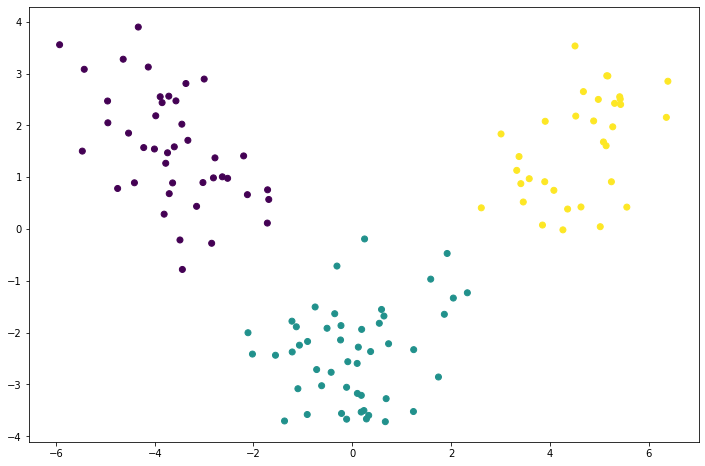

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c = y_train)

22. เทรนโมเดลทั้ง 3 ชนิดกับข้อมูล LDA

### SVM with LDA

In [128]:
svm_lda = SVC()
svm_lda.fit(X_train_lda, y_train)
svm_lda_pred = svm_lda.predict(X_test_lda)

### RF with LDA

In [129]:
rf_lda = RandomForestClassifier()
rf_lda.fit(X_train_lda, y_train)
rf_lda_pred = rf_lda.predict(X_test_lda)

### LR with LDA

In [130]:
lr_lda = LogisticRegression()
lr_lda.fit(X_train_lda, y_train)
lr_lda_pred = rf_lda.predict(X_test_lda)

23. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)


### SVM with LDA

In [134]:
print(confusion_matrix(y_test, svm_lda_pred))
print(classification_report(y_test, svm_lda_pred))

[[17  0  0]
 [ 1 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.94      1.00      0.97        17
           2       1.00      0.95      0.98        22
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### RF with LDA

In [135]:
print(confusion_matrix(y_test, rf_lda_pred))
print(classification_report(y_test, rf_lda_pred))

[[16  1  0]
 [ 0 22  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### LR with LDA

In [136]:
print(confusion_matrix(y_test, lr_lda_pred))
print(classification_report(y_test, lr_lda_pred))

[[16  1  0]
 [ 0 22  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



24. ทำ Hyperparameter tuning ด้วย GridSearchCV กับโมเดลใหม่

### SVM with Grid and LDA

In [138]:
svm_grid_lda = GridSearchCV(SVC(), svm_param, verbose=3)
svm_grid_lda.fit(X_train_lda, y_train)
svm_grid_lda_pred = svm_grid_lda.predict(X_test_lda)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] .................. C=0.01, gamma=0.01, score=0.375, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ................... C=0.01, gamma=0.1, score=0.400, total=   0.0s
[CV] C=0.01, gamma=0.1 ...............................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] ..................... C=1, gamma=0.01, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ...................... C=1, gamma=0.1, score=1.000, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ................... C=100, gamma=0.01, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=0.1 ................................................
[CV] .................... C=100, gamma=0.1, score=1.000, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ...................... C=100, gamma=1, score=1.000, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    0.6s finished


### RF with Grid and LDA

In [140]:
rf_grid_lda = GridSearchCV(RandomForestClassifier(), rf_param, verbose=3)
rf_grid_lda.fit(X_train_lda, y_train)
rf_grid_lda_pred = rf_grid_lda.predict(X_test_lda)

Fitting 5 folds for each of 294 candidates, totalling 1470 fits
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=10 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=10, score=0.917, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_dep

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=1, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=1, n_estimators=50, score=1.000, total= 

[CV]  max_depth=4, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=20 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=4, n_estimators=50 ................
[CV]  max_depth=4, min_samples_leaf=4, n_estimators=50, score=1.000, total= 

[CV]  max_depth=4, min_samples_leaf=12, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=12, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=12, n_estimators=50, score=0.917, 

[CV]  max_depth=4, min_samples_leaf=20, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=20 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=4, min_samples_leaf=20, n_estimators=50 ...............
[CV]  max_depth=4, min_samples_leaf=20, n_estimators=50, score=0.875, 

[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=2, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=2, n_estimators=50, score=0.958, total= 

[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=20 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=8, n_estimators=50 ................
[CV]  max_depth=8, min_samples_leaf=8, n_estimators=50, score=0.917, total= 

[CV]  max_depth=8, min_samples_leaf=16, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=20 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=8, min_samples_leaf=16, n_estimators=50 ...............
[CV]  max_depth=8, min_samples_leaf=16, n_estimators=50, score=0.958, 

[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=1, n_estimators=50, score=0.958, 

[CV]  max_depth=16, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=20 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=16, min_samples_leaf=4, n_estimators=50, score=0.958, 

[CV]  max_depth=16, min_samples_leaf=12, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=20 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=12, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=12, n_estimators=50, score=

[CV]  max_depth=16, min_samples_leaf=20, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=20 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=16, min_samples_leaf=20, n_estimators=50 ..............
[CV]  max_depth=16, min_samples_leaf=20, n_estimators=50, score=

[CV]  max_depth=32, min_samples_leaf=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=2, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=2, n_estimators=50, score=0.958, 

[CV]  max_depth=32, min_samples_leaf=8, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=20 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=8, n_estimators=50 ...............
[CV]  max_depth=32, min_samples_leaf=8, n_estimators=50, score=0.958, 

[CV]  max_depth=32, min_samples_leaf=16, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=20 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=20 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=32, min_samples_leaf=16, n_estimators=50 ..............
[CV]  max_depth=32, min_samples_leaf=16, n_estimators=50, score=

[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=1, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=1, n_estimators=50, score=1.000, 

[CV]  max_depth=64, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=20 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=64, min_samples_leaf=4, n_estimators=50 ...............
[CV]  max_depth=64, min_samples_leaf=4, n_estimators=50, score=1.000, 

[CV]  max_depth=64, min_samples_leaf=8, n_estimators=500, score=0.958, total=   0.8s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=10 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=10 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=10 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=10 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=10, score=1.000, total=   0.0s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=10 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=10, score=0.958, total=   0.0s
[CV] max_depth=64, min_samples_leaf=12, n_estimators=20 ..............
[CV]  max_depth=64, min_samples_leaf=12, n_estimators=20, score=

[CV]  max_depth=64, min_samples_leaf=16, n_estimators=300, score=0.960, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=300 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=300, score=1.000, total=   0.7s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=300 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=300, score=0.917, total=   0.5s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, score=1.000, total=   0.9s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, score=1.000, total=   1.0s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500, score=0.960, total=   0.9s
[CV] max_depth=64, min_samples_leaf=16, n_estimators=500 .............
[CV]  max_depth=64, min_samples_leaf=16, n_estimators=500,

[CV]  max_depth=128, min_samples_leaf=1, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=100, score=0.958, total=   0.2s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=300 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=300, score=1.000, total=   0.6s
[CV] max_depth=128, min_samples_leaf=1, n_estimators=300 .............
[CV]  max_depth=128, min_samples_leaf=1, n_estimators=300,

[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=50 ..............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=50, score=0.917, total=   0.1s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=100, score=1.000, total=   0.2s
[CV] max_depth=128, min_samples_leaf=4, n_estimators=100 .............
[CV]  max_depth=128, min_samples_leaf=4, n_estimators=100, scor

[CV]  max_depth=128, min_samples_leaf=12, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=12, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=12, n_estimators=50,

[CV]  max_depth=128, min_samples_leaf=20, n_estimators=20, score=0.960, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=20 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=20, score=0.875, total=   0.0s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=128, min_samples_leaf=20, n_estimators=50 .............
[CV]  max_depth=128, min_samples_leaf=20, n_estimators=50,

[CV]  max_depth=256, min_samples_leaf=2, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=20 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=2, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=2, n_estimators=50, score=

[CV]  max_depth=256, min_samples_leaf=8, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=20 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=20, score=0.958, total=   0.0s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=8, n_estimators=50 ..............
[CV]  max_depth=256, min_samples_leaf=8, n_estimators=50, score=

[CV]  max_depth=256, min_samples_leaf=16, n_estimators=20, score=1.000, total=   0.0s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=20 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=20, score=0.917, total=   0.0s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=50, score=0.960, total=   0.1s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=50, score=1.000, total=   0.1s
[CV] max_depth=256, min_samples_leaf=16, n_estimators=50 .............
[CV]  max_depth=256, min_samples_leaf=16, n_estimators=50,

[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:  6.6min finished


### LR with Grid and LDA

In [141]:
lr_grid_lda = GridSearchCV(LogisticRegression(), lr_param, verbose=3)
lr_grid_lda.fit(X_train_lda, y_train)
lr_grid_lda_pred = lr_grid_lda.predict(X_test_lda)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=2, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=2, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=l1

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fi

[CV]  C=2, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=liblinear .................
[CV]  C=2, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=2, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=2, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 


[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=2, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=2, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=2, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site

[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=2, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=2, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=lbfgs .............
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=2, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=2, max_iter=500, penalty=elasticnet, solver=liblinear,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=2, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=2, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=500, p

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=1000, penalty=elasticnet, solver=saga, score=nan, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=1000, penalty=none, solver=lbfgs, score=1.000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=2, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=2, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=2, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=2, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=2, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=2, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=2, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=2, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=2, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=2, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=2, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=2, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=2, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=l2, solver=liblinear ................
[CV]  C=2, max_iter=5000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=2, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=2, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=2, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=2, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=2, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=2, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=2, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=3, max_iter=100, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=3, max_iter=100, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=3, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=3, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=liblinear .........
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=liblinear .........
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=100, penalty=elasticnet, solver=liblinear .........
[CV]  C=3, max_iter=100, penalty=elasticnet, solver=liblinear,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=3, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=3, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=3, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=50

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=3, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=3, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=3, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=3, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=3, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=3, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=3, max_iter=1000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=3, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=3, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=3, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=3, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=3, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=3, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=3, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV] C=3, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, solver=sag ..............
[CV]  C=3, max_iter=2500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=3, max_iter=2500, penalty=elasticnet, s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=3, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=3, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=3,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=3, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=3, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=3, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=3, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=3, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=3, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=4, max_iter=100, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l1, solver=saga ......................
[CV]  C=4, max_iter=100, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=4, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=4, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=lbfgs .............
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=liblinear .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=100, penalty=elasticnet, solver=liblinear .........
[CV]  C=4, max_iter=100, penalty=elasticnet, solver=liblinear, sco

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=4, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=l1, solver=newton-cg .................
[CV]  C=4, max_iter=500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=50

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=4, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=4, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=4, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=4, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=4, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=4, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=liblinear ........
[CV]  C=4, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=4, max_iter=2500, penalty=elasticnet, solver=sag ..............
[CV]  C=4, max_iter=2500, penalty=elasticnet

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=4, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=4,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=4, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=4, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=4, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=4, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=4, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=4, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=5, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=5, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=5, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=5, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=5, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=l2, solv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag


[CV] C=5, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=5, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=5, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=5, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=5, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=5, max_iter=10

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. Th

[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=5, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=5, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=5, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=5, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=lbfgs ..................


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=5, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_it

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=5, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=5,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o


[CV] C=5, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=5, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=liblinear ................
[CV]  C=5, max_iter=5000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=l2, solver=liblinear ................
[CV]  C=5, max_iter=5000

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=5, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=5, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=5, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=5, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=5, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=6, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=6, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=6, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=6, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=newton-cg .................
[CV]  C=6, max_iter=500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=l2, solver=lbfgs .....................
[CV]  C=6, max_iter=500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_it

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. Th

[CV]  C=6, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=6, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=6, max_iter=500, penalty=elasticnet, solver=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=6, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=6, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=6, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=6, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=500, 

[CV]  C=6, max_iter=1000, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=l2, solver=saga .....................
[CV]  C=6, max_iter=1000, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg ........
[CV]  C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg ........
[CV]  C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg ........
[CV]  C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg ........
[CV]  C=6, max_iter=1000, penalty=elasticnet, solver=newton-cg, score=nan

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=6, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l1, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=6, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=lbfgs ....................
[CV]  C=6, max_iter=2500, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=liblinear ................
[CV]  C=6, max_iter=2500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=l2, solver=liblinear ................
[CV]  C=6, max_iter=2500, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=6, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=6, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=6, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=6, max_iter=5000, penalty=l1, solver=lbfgs ....................
[CV]  C=6, max_iter=5000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=6, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=6, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=6, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=6, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=6, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=6, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=7, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=l1, solver=lbfgs .....................
[CV]  C=7, max_iter=100, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=7, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=7, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=7, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=7, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=7, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=7, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=7, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=7, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=l2, solv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=7, max_iter=100, penalty=none, solver=liblinear ...............
[CV]  C=7, max_iter=100, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. Th

[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=7, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=7, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=  

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=7, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_ite

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=7, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=7, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=7, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=7, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=7, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=7, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=7, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=7, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=7, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=7, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=7, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=7, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=7, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=7, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=7, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=100, penalty=l1, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=8, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=newton-cg .................
[CV]  C=8, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=8, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=8, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=l2, solver=lbfgs .....................
[CV]  C=8, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=8, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=100, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site

[CV]  C=8, max_iter=500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=liblinear .................
[CV]  C=8, max_iter=500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=8, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=8, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=8, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=8, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solver=sag .......................
[CV]  C=8, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=8, max_iter=500, penalty=l1, solv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs s

[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=newton-cg ...............
[CV]  C=8, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=500, penalty=none, solver=lbfgs ...................
[CV]  C=8, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=8, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l1, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=8, max_i

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=8, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=lbfgs ....................
[CV]  C=8, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=l2, solver=liblinear ................
[CV]  C=8, max_iter=1000, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=8, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=1000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, t

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=8, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_it

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=8, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=2500, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=2500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=2500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=8, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=8, max_

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l1, solver=saga .....................
[CV]  C=8, max_iter=5000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=8, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=newton-cg ..............
[CV]  C=8, max_iter=5000, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=lbfgs ..................
[CV]  C=8, max_iter=5000, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=8, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=8, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=8, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_it

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=9, max_iter=100, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=liblinear .................
[CV]  C=9, max_iter=100, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=100, penalty=l1, solv

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=9, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=sag .......................
[CV]  C=9, max_iter=100, penalty=l2, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=9, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=9, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=9, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=9, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=l2, solver=saga ......................
[CV]  C=9, max_iter=100, penalty=l2, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=elast

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packag

[CV]  C=9, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=100, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=100, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=100, pe

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this tra

[CV]  C=9, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=liblinear .........
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=9, max_iter=500, penalty=elasticnet, solver=sag ...............
[CV]  C=9, max_iter=500, penalty=elasticnet, solver=sag, score=nan, to

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=sag .....................
[CV]  C=9, max_iter=500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, penalty=none, solver=saga ....................
[CV]  C=9, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=500, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/s

[CV]  C=9, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l1, solver=saga .....................
[CV]  C=9, max_iter=1000, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt


[CV] C=9, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=lbfgs ..................
[CV]  C=9, max_iter=1000, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=9, max_iter=1000, penalty=none, solver=liblinear, score=nan, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=liblinear ..............
[CV]  C=9,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means 

[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=1000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=2500, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=2500, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=2500, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l1, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=9,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score o

[CV]  C=9, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=newton-cg ................
[CV]  C=9, max_iter=5000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=9, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=l2, solver=lbfgs ....................
[CV]  C=9, max_iter=5000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=sag ....................
[CV]  C=9, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=9, max_iter=5000, penalty=none, solver=saga ...................
[CV]  C=9, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=100, penalty=l1, solver=newton-cg ................
[CV]  C=10, max_iter=100, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10,

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=10, max_iter=100, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=lbfgs ....................
[CV]  C=10, max_iter=100, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=l2, solver=liblinear ................
[CV]  C=10, max_iter=100, penalty=l2, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

[CV]  C=10, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=newton-cg ..............
[CV]  C=10, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=newton-cg ..............
[CV]  C=10, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=newton-cg ..............
[CV]  C=10, max_iter=100, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=100, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=100, penalty=none, solver=lbfgs, score=1.000, total

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site

[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=liblinear ................
[CV]  C=10, max_iter=500, penalty=l1, solver=liblinear, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=l1, solver=sag ......................
[CV]  C=10, max_iter=500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=500, penalty=

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/s

[CV]  C=10, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=newton-cg ..............
[CV]  C=10, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=newton-cg ..............
[CV]  C=10, max_iter=500, penalty=none, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=lbfgs ..................
[CV]  C=10, max_iter=500, penalty=none, solver=lbfgs, score=1.000, total=   

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: penalty='none' is not supported for the liblinear solver

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site

[CV]  C=10, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=500, penalty=none, solver=saga ...................
[CV]  C=10, max_iter=500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV]

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=newton-cg ...............
[CV]  C=10, max_iter=1000, penalty=l2, solver=newton-cg, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lbfgs ...................
[CV]  C=10, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lbfgs ...................
[CV]  C=10, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lbfgs ...................
[CV]  C=10, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lbfgs ...................
[CV]  C=10, max_iter=1000, penalty=l2, solver=lbfgs, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=l2, solver=lbfgs ...................
[CV]  C=10, ma

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=sag .............
[CV]  C=10, max_iter=1000, penalty=elasticnet, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=1000, penalty=elasticnet, solver=sag .............
[CV]  C=10, max_iter=1000, penalty=elast

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the

[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=1000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=1000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=1000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=10, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=sag .....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=saga ....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1, solver=saga ....................
[CV]  C=10, max_iter=2500, penalty=l1, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=l1

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs ...........
[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=lbfgs, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=2500, penalty=elasticnet, solver=liblinear, score=nan, total=   0.0s
[CV] C=10, max_iter=2500, penalty=elasticnet, solver=liblinear .......
[CV]  C=10, max_iter=2500, penalty=elasticnet, sol

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=2500, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, 

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver l

[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=2500, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=2500, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=10, max_iter=5000, penalty=l1, solver=newton-cg ...............
[CV]  C=10, max_iter=5000, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[C

/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Only 'saga' solver supports elasticnet penalty, got solver=liblinear.

  FitFailedWarning)
/opt/anaconda3/lib/pyt

[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=sag ...................
[CV]  C=10, max_iter=5000, penalty=none, solver=sag, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, m

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' w

[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s
[CV] C=10, max_iter=5000, penalty=none, solver=saga ..................
[CV]  C=10, max_iter=5000, penalty=none, solver=saga, score=1.000, total=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Done 4500 out of 4500 | elapsed:   32.3s finished


25. วัดผลโมเดลใหม่ โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision (ทั้งแบบ micro, macro)

### SVM with Grid and LDA

In [142]:
print(confusion_matrix(y_test, svm_grid_lda_pred))
print(classification_report(y_test, svm_grid_lda_pred))

[[16  1  0]
 [ 1 21  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.94      0.94      0.94        17
           2       0.95      0.95      0.95        22
           3       1.00      1.00      1.00        15

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54



### RF with Grid and LDA

In [143]:
print(confusion_matrix(y_test, rf_grid_lda_pred))
print(classification_report(y_test, rf_grid_lda_pred))

[[16  1  0]
 [ 2 20  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       0.89      0.94      0.91        17
           2       0.95      0.91      0.93        22
           3       1.00      1.00      1.00        15

    accuracy                           0.94        54
   macro avg       0.95      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



### LR with Grid and LDA

In [144]:
print(confusion_matrix(y_test, lr_grid_lda_pred))
print(classification_report(y_test, lr_grid_lda_pred))

[[16  1  0]
 [ 0 22  0]
 [ 0  0 15]]
              precision    recall  f1-score   support

           1       1.00      0.94      0.97        17
           2       0.96      1.00      0.98        22
           3       1.00      1.00      1.00        15

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



26. ทำ Data Visualization ค่า Acc ของทุกโมเดลที่ทำมาด้วย plotly

In [146]:
data_acc = {'Models':['SVM', 'RF', 'LR', 
                      'SVM with Grid', 'RF with Grid', 'LR with Grid',
                      'SVM with LDA', 'RF with LDA', 'LR with LDA',
                      'SVM with Grid and LDA', 'RF with Grid and LDA', 'LR with Grid and LDA'], 
            'ACC':[accuracy_score(y_test, svm_pred), accuracy_score(y_test, rf_pred), accuracy_score(y_test, lr_pred), 
                   accuracy_score(y_test, svm_grid_pred), accuracy_score(y_test, rf_grid_pred), accuracy_score(y_test, lr_grid_pred),
                   accuracy_score(y_test, svm_lda_pred), accuracy_score(y_test, rf_lda_pred), accuracy_score(y_test, lr_lda_pred),
                   accuracy_score(y_test, svm_grid_lda_pred), accuracy_score(y_test, rf_grid_lda_pred), accuracy_score(y_test, lr_grid_lda_pred)]}
acc = pd.DataFrame(data_acc)
acc

Models       ACC
0                     SVM  0.981481
1                      RF  0.962963
2                      LR  0.944444
3           SVM with Grid  0.981481
4            RF with Grid  0.962963
5            LR with Grid  0.962963
6            SVM with LDA  0.981481
7             RF with LDA  0.981481
8             LR with LDA  0.981481
9   SVM with Grid and LDA  0.962963
10   RF with Grid and LDA  0.944444
11   LR with Grid and LDA  0.981481

In [153]:
px.bar(acc, x='Models', y='ACC', title='ACC Comparison', range_y = [0.9, 1])

27. ทำ Data Visualization ค่า F1 Score ของทุกโมเดลที่ทำมา 
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน

In [168]:
data_compare = {'Models':['SVM','SVM','SVM','SVM',
                      'RF', 'RF', 'RF','RF',
                      'LR', 'LR', 'LR', 'LR',
                      'SVM with Grid', 'SVM with Grid', 'SVM with Grid', 'SVM with Grid',
                      'RF with Grid', 'RF with Grid', 'RF with Grid', 'RF with Grid', 
                      'LR with Grid', 'LR with Grid', 'LR with Grid', 'LR with Grid',   
                      'SVM with LDA', 'SVM with LDA', 'SVM with LDA', 'SVM with LDA',
                      'RF with LDA', 'RF with LDA', 'RF with LDA', 'RF with LDA',
                      'LR with LDA', 'LR with LDA', 'LR with LDA', 'LR with LDA',    
                      'SVM with Grid and LDA', 'SVM with Grid and LDA', 'SVM with Grid and LDA', 'SVM with Grid and LDA',
                      'RF with Grid and LDA','RF with Grid and LDA', 'RF with Grid and LDA', 'RF with Grid and LDA',
                      'LR with Grid and LDA','LR with Grid and LDA', 'LR with Grid and LDA', 'LR with Grid and LDA',    
                         ], 
            'F1 Score':[f1_score(y_test, svm_pred, average='micro', labels=[1]),
                        f1_score(y_test, svm_pred, average='micro', labels=[2]),
                        f1_score(y_test, svm_pred, average='micro', labels=[3]),
                        f1_score(y_test, svm_pred, average='macro'),
                        f1_score(y_test, rf_pred, average='micro', labels=[1]),
                        f1_score(y_test, rf_pred, average='micro', labels=[2]),
                        f1_score(y_test, rf_pred, average='micro', labels=[3]),
                        f1_score(y_test, rf_pred, average='macro'),
                        f1_score(y_test, lr_pred, average='micro', labels=[1]),
                        f1_score(y_test, lr_pred, average='micro', labels=[2]),
                        f1_score(y_test, lr_pred, average='micro', labels=[3]),
                        f1_score(y_test, lr_pred, average='macro'),
                        f1_score(y_test, svm_grid_pred, average='micro', labels=[1]),
                        f1_score(y_test, svm_grid_pred, average='micro', labels=[2]),
                        f1_score(y_test, svm_grid_pred, average='micro', labels=[3]),
                        f1_score(y_test, svm_grid_pred, average='macro'),
                        f1_score(y_test, rf_grid_pred, average='micro', labels=[1]),
                        f1_score(y_test, rf_grid_pred, average='micro', labels=[2]),
                        f1_score(y_test, rf_grid_pred, average='micro', labels=[3]),
                        f1_score(y_test, rf_grid_pred, average='macro'),
                        f1_score(y_test, lr_grid_pred, average='micro', labels=[1]),
                        f1_score(y_test, lr_grid_pred, average='micro', labels=[2]),
                        f1_score(y_test, lr_grid_pred, average='micro', labels=[3]),
                        f1_score(y_test, lr_grid_pred, average='macro'),
                        f1_score(y_test, svm_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, svm_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, svm_lda_pred, average='micro', labels=[3]),
                        f1_score(y_test, svm_lda_pred, average='macro'),
                        f1_score(y_test, rf_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, rf_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, rf_lda_pred, average='micro', labels=[3]),  
                        f1_score(y_test, rf_lda_pred, average='macro'),
                        f1_score(y_test, lr_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, lr_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, lr_lda_pred, average='micro', labels=[3]),  
                        f1_score(y_test, lr_lda_pred, average='macro'),
                        f1_score(y_test, svm_grid_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, svm_grid_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, svm_grid_lda_pred, average='micro', labels=[3]),
                        f1_score(y_test, svm_grid_lda_pred, average='macro'),
                        f1_score(y_test, rf_grid_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, rf_grid_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, rf_grid_lda_pred, average='micro', labels=[3]),
                        f1_score(y_test, rf_grid_lda_pred, average='macro'),
                        f1_score(y_test, lr_grid_lda_pred, average='micro', labels=[1]),
                        f1_score(y_test, lr_grid_lda_pred, average='micro', labels=[2]),
                        f1_score(y_test, lr_grid_lda_pred, average='micro', labels=[3]),
                        f1_score(y_test, lr_grid_lda_pred, average='macro')
                        ],
               'Pre Score':[precision_score(y_test, svm_pred, average='micro', labels=[1]),
                            precision_score(y_test, svm_pred, average='micro', labels=[2]),
                            precision_score(y_test, svm_pred, average='micro', labels=[3]),
                            precision_score(y_test, svm_pred, average='macro'),
                            precision_score(y_test, rf_pred, average='micro', labels=[1]),
                            precision_score(y_test, rf_pred, average='micro', labels=[2]),
                            precision_score(y_test, rf_pred, average='micro', labels=[3]),
                            precision_score(y_test, rf_pred, average='macro'),
                            precision_score(y_test, lr_pred, average='micro', labels=[1]),
                            precision_score(y_test, lr_pred, average='micro', labels=[2]),
                            precision_score(y_test, lr_pred, average='micro', labels=[3]),
                            precision_score(y_test, lr_pred, average='macro'),
                            precision_score(y_test, svm_grid_pred, average='micro', labels=[1]),
                            precision_score(y_test, svm_grid_pred, average='micro', labels=[2]),
                            precision_score(y_test, svm_grid_pred, average='micro', labels=[3]),
                            precision_score(y_test, svm_grid_pred, average='macro'),
                            precision_score(y_test, rf_grid_pred, average='micro', labels=[1]),
                            precision_score(y_test, rf_grid_pred, average='micro', labels=[2]),
                            precision_score(y_test, rf_grid_pred, average='micro', labels=[3]),
                            precision_score(y_test, rf_grid_pred, average='macro'),
                            precision_score(y_test, lr_grid_pred, average='micro', labels=[1]),
                            precision_score(y_test, lr_grid_pred, average='micro', labels=[2]),
                            precision_score(y_test, lr_grid_pred, average='micro', labels=[3]),
                            precision_score(y_test, lr_grid_pred, average='macro'),
                            precision_score(y_test, svm_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, svm_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, svm_lda_pred, average='micro', labels=[3]),
                            precision_score(y_test, svm_lda_pred, average='macro'),
                            precision_score(y_test, rf_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, rf_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, rf_lda_pred, average='micro', labels=[3]),  
                            precision_score(y_test, rf_lda_pred, average='macro'),
                            precision_score(y_test, lr_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, lr_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, lr_lda_pred, average='micro', labels=[3]),  
                            precision_score(y_test, lr_lda_pred, average='macro'),
                            precision_score(y_test, svm_grid_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, svm_grid_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, svm_grid_lda_pred, average='micro', labels=[3]),
                            precision_score(y_test, svm_grid_lda_pred, average='macro'),
                            precision_score(y_test, rf_grid_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, rf_grid_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, rf_grid_lda_pred, average='micro', labels=[3]),
                            precision_score(y_test, rf_grid_lda_pred, average='macro'),
                            precision_score(y_test, lr_grid_lda_pred, average='micro', labels=[1]),
                            precision_score(y_test, lr_grid_lda_pred, average='micro', labels=[2]),
                            precision_score(y_test, lr_grid_lda_pred, average='micro', labels=[3]),
                            precision_score(y_test, lr_grid_lda_pred, average='macro')
                            ],
                'Rec Score':[recall_score(y_test, svm_pred, average='micro', labels=[1]),
                             recall_score(y_test, svm_pred, average='micro', labels=[2]),
                             recall_score(y_test, svm_pred, average='micro', labels=[3]),
                             recall_score(y_test, svm_pred, average='macro'),
                             recall_score(y_test, rf_pred, average='micro', labels=[1]),
                             recall_score(y_test, rf_pred, average='micro', labels=[2]),
                             recall_score(y_test, rf_pred, average='micro', labels=[3]),
                             recall_score(y_test, rf_pred, average='macro'),
                             recall_score(y_test, lr_pred, average='micro', labels=[1]),
                             recall_score(y_test, lr_pred, average='micro', labels=[2]),
                             recall_score(y_test, lr_pred, average='micro', labels=[3]),
                             recall_score(y_test, lr_pred, average='macro'),
                             recall_score(y_test, svm_grid_pred, average='micro', labels=[1]),
                             recall_score(y_test, svm_grid_pred, average='micro', labels=[2]),
                             recall_score(y_test, svm_grid_pred, average='micro', labels=[3]),
                             recall_score(y_test, svm_grid_pred, average='macro'),
                             recall_score(y_test, rf_grid_pred, average='micro', labels=[1]),
                             recall_score(y_test, rf_grid_pred, average='micro', labels=[2]),
                             recall_score(y_test, rf_grid_pred, average='micro', labels=[3]),
                             recall_score(y_test, rf_grid_pred, average='macro'),
                             recall_score(y_test, lr_grid_pred, average='micro', labels=[1]),
                             recall_score(y_test, lr_grid_pred, average='micro', labels=[2]),
                             recall_score(y_test, lr_grid_pred, average='micro', labels=[3]),
                             recall_score(y_test, lr_grid_pred, average='macro'),
                             recall_score(y_test, svm_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, svm_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, svm_lda_pred, average='micro', labels=[3]),
                             recall_score(y_test, svm_lda_pred, average='macro'),
                             recall_score(y_test, rf_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, rf_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, rf_lda_pred, average='micro', labels=[3]),  
                             recall_score(y_test, rf_lda_pred, average='macro'),
                             recall_score(y_test, lr_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, lr_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, lr_lda_pred, average='micro', labels=[3]),  
                             recall_score(y_test, lr_lda_pred, average='macro'),
                             recall_score(y_test, svm_grid_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, svm_grid_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, svm_grid_lda_pred, average='micro', labels=[3]),
                             recall_score(y_test, svm_grid_lda_pred, average='macro'),
                             recall_score(y_test, rf_grid_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, rf_grid_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, rf_grid_lda_pred, average='micro', labels=[3]),
                             recall_score(y_test, rf_grid_lda_pred, average='macro'),
                             recall_score(y_test, lr_grid_lda_pred, average='micro', labels=[1]),
                             recall_score(y_test, lr_grid_lda_pred, average='micro', labels=[2]),
                             recall_score(y_test, lr_grid_lda_pred, average='micro', labels=[3]),
                             recall_score(y_test, lr_grid_lda_pred, average='macro')
                             ]}

In [169]:
compare = pd.DataFrame(data_compare)

class_lst = []
for i in np.arange(0,12):
    for j in [1,2,3,'macro']:
        class_lst.append(j)
compare['Class'] = class_lst

In [170]:
compare

Models  F1 Score  Pre Score  Rec Score  Class
0                     SVM  1.000000   1.000000   1.000000      1
1                     SVM  0.976744   1.000000   0.954545      2
2                     SVM  0.967742   0.937500   1.000000      3
3                     SVM  0.981495   0.979167   0.984848  macro
4                      RF  0.971429   0.944444   1.000000      1
5                      RF  0.952381   1.000000   0.909091      2
6                      RF  0.967742   0.937500   1.000000      3
7                      RF  0.963850   0.960648   0.969697  macro
8                      LR  0.941176   0.941176   0.941176      1
9                      LR  0.930233   0.952381   0.909091      2
10                     LR  0.967742   0.937500   1.000000      3
11                     LR  0.946384   0.943686   0.950089  macro
12          SVM with Grid  1.000000   1.000000   1.000000      1
13          SVM with Grid  0.976744   1.000000   0.954545      2
14          SVM with Grid  0.967742   0.937500   1.000000      3
15          SVM with Grid  0.981495   0.979167   0.984848  macro
16           RF with Grid  0.971429   0.944444   1.000000      1
17           RF with Grid  0.952381   1.000000   0.909091      2
18           RF with Grid  0.967742   0.937500   1.000000      3
19           RF with Grid  0.963850   0.960648   0.969697  macro
20           LR with Grid  0.971429   0.944444   1.000000      1
21           LR with Grid  0.952381   1.000000   0.909091      2
22           LR with Grid  0.967742   0.937500   1.000000      3
23           LR with Grid  0.963850   0.960648   0.969697  macro
24           SVM with LDA  0.971429   0.944444   1.000000      1
25           SVM with LDA  0.976744   1.000000   0.954545      2
26           SVM with LDA  1.000000   1.000000   1.000000      3
27           SVM with LDA  0.982724   0.981481   0.984848  macro
28            RF with LDA  0.969697   1.000000   0.941176      1
29            RF with LDA  0.977778   0.956522   1.000000      2
30            RF with LDA  1.000000   1.000000   1.000000      3
31            RF with LDA  0.982492   0.985507   0.980392  macro
32            LR with LDA  0.969697   1.000000   0.941176      1
33            LR with LDA  0.977778   0.956522   1.000000      2
34            LR with LDA  1.000000   1.000000   1.000000      3
35            LR with LDA  0.982492   0.985507   0.980392  macro
36  SVM with Grid and LDA  0.941176   0.941176   0.941176      1
37  SVM with Grid and LDA  0.954545   0.954545   0.954545      2
38  SVM with Grid and LDA  1.000000   1.000000   1.000000      3
39  SVM with Grid and LDA  0.965241   0.965241   0.965241  macro
40   RF with Grid and LDA  0.914286   0.888889   0.941176      1
41   RF with Grid and LDA  0.930233   0.952381   0.909091      2
42   RF with Grid and LDA  1.000000   1.000000   1.000000      3
43   RF with Grid and LDA  0.948173   0.947090   0.950089  macro
44   LR with Grid and LDA  0.969697   1.000000   0.941176      1
45   LR with Grid and LDA  0.977778   0.956522   1.000000      2
46   LR with Grid and LDA  1.000000   1.000000   1.000000      3
47   LR with Grid and LDA  0.982492   0.985507   0.980392  macro

Text(0.5, 1.0, 'F1 Score Comparison')

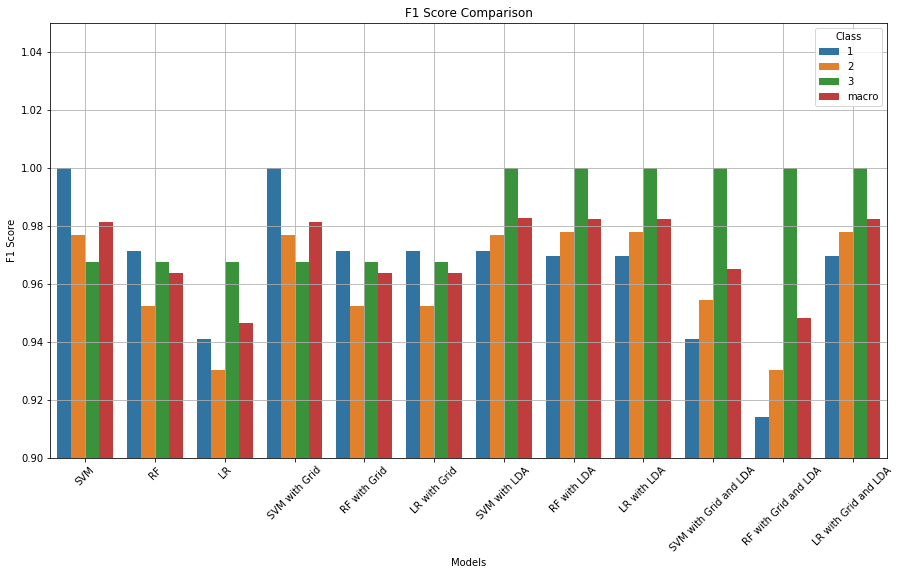

In [171]:
plt.figure(figsize=(15,8))
sns.barplot(data=compare, x='Models', y='F1 Score', hue='Class')
plt.ylim(0.9,)
plt.xticks(rotation=45)
plt.grid()
plt.title('F1 Score Comparison')

28.ทำ Data Visualization ค่า Precision ของทุกโมเดลที่ทำมา
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน

Text(0.5, 1.0, 'Precision Score Comparison')

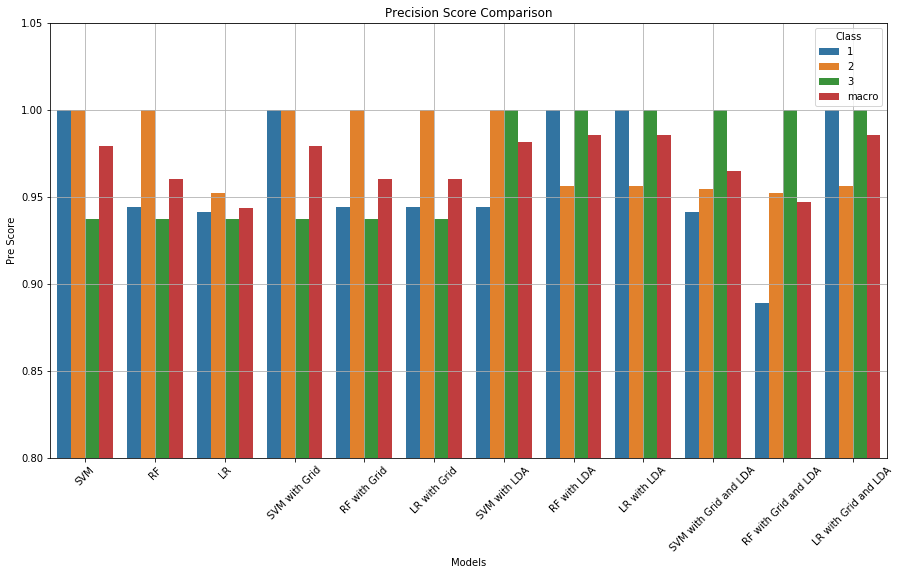

In [175]:
plt.figure(figsize=(15,8))
sns.barplot(data=compare, x='Models', y='Pre Score', hue='Class')
plt.ylim(0.8,)
plt.xticks(rotation=45)
plt.grid()
plt.title('Precision Score Comparison')

29. ทำ Data Visualization ค่า Recall ของทุกโมเดลที่ทำมา
ทั้งแบบ Micro และ Macro อยู่ในกราฟเดียวกัน


Text(0.5, 1.0, 'Recall Score Comparison')

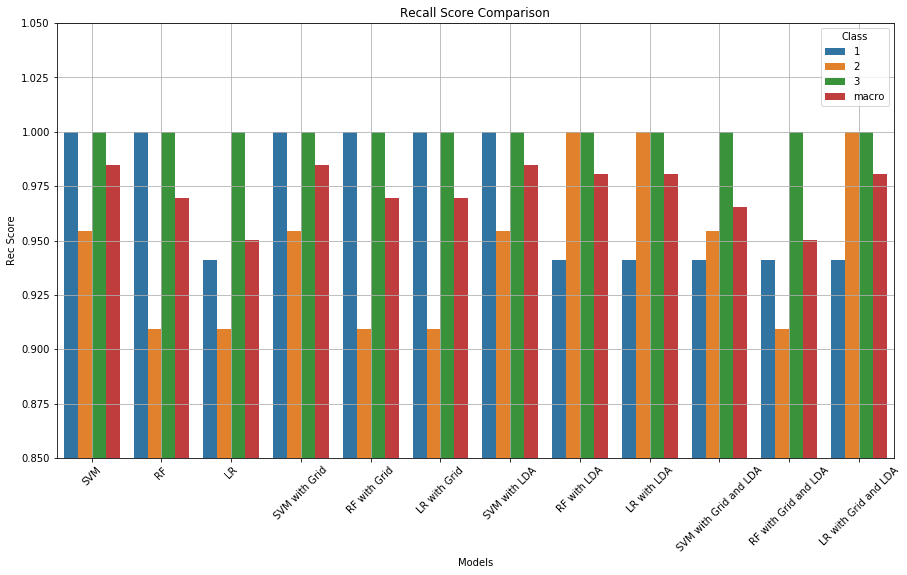

In [181]:
plt.figure(figsize=(15,8))
sns.barplot(data=compare, x='Models', y='Rec Score', hue='Class')
plt.ylim(0.85,)
plt.xticks(rotation=45)
plt.grid()
plt.title('Recall Score Comparison')

30. ทำ Data Visualization ค่า Accuracy, F1 Score, Precision, Recall ของโมเดล 2 ชนิดที่ทำ PCA และ LDA เพื่อเปรียบเทียบค่า 
แบบก่อนทำ Hyperparameter tuning

In [184]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_std_train)
X_test_pca = pca.transform(X_std_test)

In [185]:
# SVM
svm_pca = SVC()
svm_pca.fit(X_train_pca, y_train)
svm_pca_pred = svm_pca.predict(X_test_pca)

# RF
rf_pca = RandomForestClassifier()
rf_pca.fit(X_train_pca, y_train)
rf_pca_pred = rf_pca.predict(X_test_pca)

# LR
lr_pca = LogisticRegression()
lr_pca.fit(X_train_pca, y_train)
lr_pca_pred = lr_pca.predict(X_test_pca)

In [189]:
data_pca_lda = {'Acc' : [accuracy_score(y_test, svm_lda_pred),
                         accuracy_score(y_test, rf_lda_pred),
                         accuracy_score(y_test, lr_lda_pred),
                         accuracy_score(y_test, svm_pca_pred),
                         accuracy_score(y_test, rf_pca_pred),
                         accuracy_score(y_test, lr_pca_pred)],
                'F1' : [f1_score(y_test, svm_lda_pred, average = 'macro'),
                        f1_score(y_test, rf_lda_pred, average = 'macro'),
                        f1_score(y_test, lr_lda_pred, average = 'macro'),
                        f1_score(y_test, svm_pca_pred, average = 'macro'),
                        f1_score(y_test, rf_pca_pred, average = 'macro'),
                        f1_score(y_test, lr_pca_pred, average = 'macro')],
               'Pre' : [precision_score(y_test, svm_lda_pred, average = 'macro'),
                        precision_score(y_test, rf_lda_pred, average = 'macro'),
                        precision_score(y_test, lr_lda_pred, average = 'macro'),
                        precision_score(y_test, svm_pca_pred, average = 'macro'),
                        precision_score(y_test, rf_pca_pred, average = 'macro'),
                        precision_score(y_test, lr_pca_pred, average = 'macro')],
               'Rec' : [recall_score(y_test, svm_lda_pred, average = 'macro'),
                        recall_score(y_test, rf_lda_pred, average = 'macro'),
                        recall_score(y_test, lr_lda_pred, average = 'macro'),
                        recall_score(y_test, svm_pca_pred, average = 'macro'),
                        recall_score(y_test, rf_pca_pred, average = 'macro'),
                        recall_score(y_test, lr_pca_pred, average = 'macro')]}

In [222]:
pca_lda = pd.DataFrame(data_pca_lda)

models_lst = []
for i in np.arange(0, 2):
    for j in ['SVM', 'RF', 'LR']:
        models_lst.append(j)
pca_lda['Models'] = models_lst

pca_lda_lst = []
for i in np.arange(0, 3):
    for j in ['LDA']:
        pca_lda_lst.append(j)
for i in np.arange(0, 3):
    for j in ['PCA']:
        pca_lda_lst.append(j)
        
pca_lda['PCA_LDA'] = pca_lda_lst

In [223]:
pca_lda

Acc        F1       Pre       Rec Models PCA_LDA
0  0.981481  0.982724  0.981481  0.984848    SVM     LDA
1  0.981481  0.982492  0.985507  0.980392     RF     LDA
2  0.981481  0.982492  0.985507  0.980392     LR     LDA
3  0.944444  0.946339  0.944079  0.954545    SVM     PCA
4  0.925926  0.928930  0.925463  0.934938     RF     PCA
5  0.925926  0.928930  0.925463  0.934938     LR     PCA

Text(0.5, 1.0, 'Recall Score Comparison')

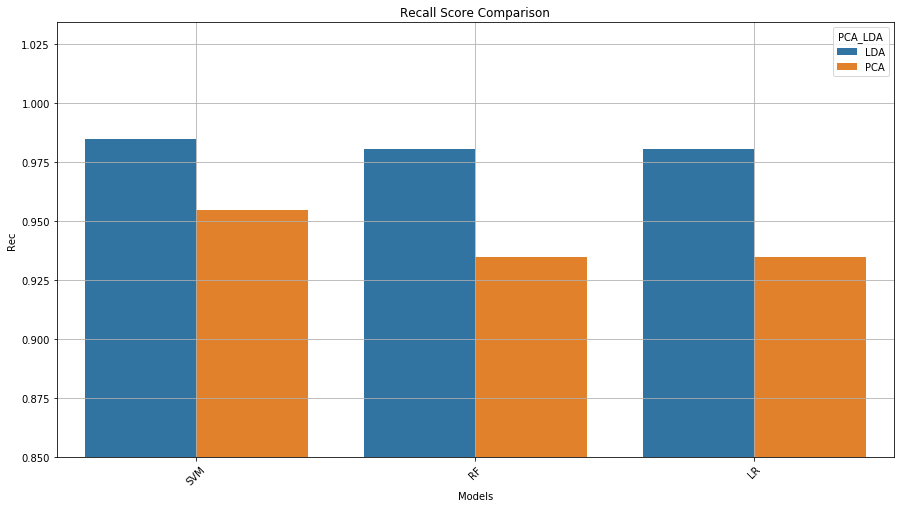

In [228]:
plt.figure(figsize=(15,8))
sns.barplot(data = pca_lda, x='Models', y='Rec', hue='PCA_LDA')
plt.ylim(0.85,)
plt.xticks(rotation=45)
plt.grid()
plt.title('Recall Score Comparison')

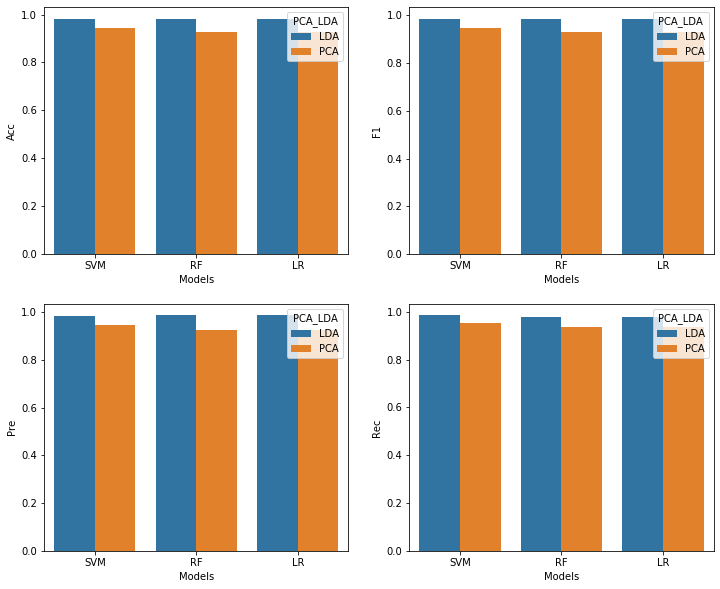

In [248]:
f, axes = plt.subplots(2, 2, figsize = (12, 10))
axes = axes.ravel()
for i, j in enumerate(pca_lda.drop(['Models', 'PCA_LDA'], axis = 1)):
    plot = sns.barplot(data = pca_lda, x = 'Models', y = j, hue='PCA_LDA', ax = axes[i])

31. ทำ Data Visualization ค่า Accuracy, F1 Score, Precision, Recall ของโมเดล 2 ชนิดที่ทำ PCA และ LDA เพื่อเปรียบเทียบค่า 
แบบหลังทำ Hyperparameter tuning

